# GPU Programming
Regular sequential code running on a single thread, takes advantage of a very small amount of resources available on the chip. Here we talk about the concepts and programming constructs that help us to take advantage of all the resources like GPU's, vectors, DSP's and other application specific ASIC's available on the chip. 

## CPU Execution Model
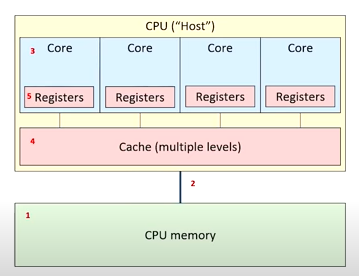

A CPU has a region of dedicated memory connected to it via a bus. It has multiple levels of memeory cache for faster memory access. Most CPU's have multiple cores with there own set of registers. CPU's are meant for task parallelism. Tasks are long executing threads performing different operations on different data. CPU's are meant for control flow and optimized for latency i.e the CPU minimizes the amount time required for the task.

## GPU Execution Model
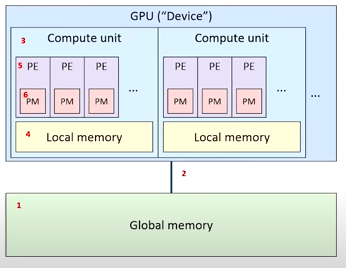

The GPU has a region of global memory, to pass data in and out of the GPU. This memeory is connected to the GPU via a bus. There are thousands of compute units on a GPU. They are equivalent to cores on a CPU. Each compute unit has a local memory to store the partial results. Each compute unit has a few processing elements(PE) and each PE has its own dedicated private memory. Unlike CPU we as the progrmmers have to control the locality of the data. A PE is a light weight thread(called work item), hence the compute unit is light weight thread pool(called work group).

GPU's are meant for data parallelism, in data parallelism tasks are light and small which perform the same operation on different data(SIMD). GPU's are optimized for high throughput, individual tasks will run slower but many tasks running in parallel will increase the throughput.

## The CPU and the GPU working
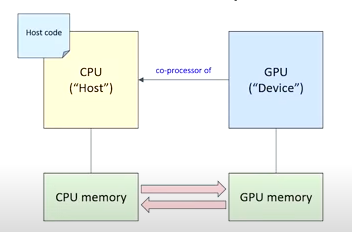

Both the CPU and GPU have their own discrete memory and can communicate with each other. GPU does not have the main function it is invoked from the CPU. Fisrt the CPU allocates memory on the GPU and copies the data on to the GPU. Then the CPU launches the kernels on the GPU for execution, on execution complete data is copied back to the CPU. There are both explicit and implicit models available for the programmer to move the data in and out of the GPU.

This heterogeneous dispatch allows us to fully utilize the resources of the entire chip. Most of the programming models are single source, meaning both the CPU code and the device(GPU) code are in the same source file. When we combine CPU cores, GPU cores and other ASIC's together we get heterogeneity. The future is parallel and heterogeneous. We have programs like CUDA, SYCL, OPENGL to syncronize cpu, gpu and other devices. Both the host(CPU) and the devices will have their own compilers to make this interoperability possible.

## Multi Core CPU vs Many Core GPU
Multicore CPU's are optimized for single thread, fast serial processing with lots of control. Many core GPU's are optimized for aggregate throughput, deemphasizing invididual task performance. It becomes a memory bound problem from processing bound problem when we move from CPU to GPU. Since GPU's work on vectors, they work best when vector length's are aligned and data is homogeneous in the memory. When the size of the data is small the CPU's might work better than GPU's for parallel data, it's only when the data gets large we see the advantages of the GPU. Also not all algorithms can be executed in parallel, associative and cummulative operations like plus and multiplication can take full advantage of parallel execution.

Therefore to get the best results we have to use the heterogeneity depending on the problem at hand. To get the best performance from the chip, data transfer between CPU and GPU must be efficient and the data has to be converted from array of structures to structure fo arrays for the GPU since they work best with continous homogeneous data.

## Programming constructs for hetrogeneous environment C++
* If we want to utilize the CPU cores we can use the C++ threading. To get the optimized number of threads on a given machine we have to query the hardware concurrency, which is a C++ standard API.
* For asynchronous agents like networking, devices etc, C++ has threads, thread local storage and lambda functions to go off to different threads and execute them independently.
* For concurrent collections i.e operations on groups of things, C++ has async, packaged tasks, promises, futures and atomics.
* Mutable shared state can be maintained in C++ using locks, mutex, conditional variable and atomics.
* Most of these are for concurrency, there is very little here for parallelism.
* From the above, lambda's can be used to pass function's for hetrogeneous off loading, other than that the only things that work for parallelism are atomicity and futures.
* The more recent versions of C++ 17 and 20 have a lot more constructs for GPU's and parallel programming.
* Parallel STL concurrent collections now allow us to specify the execution policy. Below are the supported execution policies.
  * seq : sequencial in order execution, executed on a single thread i.e legacy implementation.
  * par : parallel execution on multiple cores.
  * par_seq : parallel vector execution, makes use of the vector on the CPU.
* The above execution policies don't have a execution policy to run on the GPU. C++ allows for vendor specific policies to be added and supported by thier device(GPU) specific compiler.
* New algorithms like reduce have been introduced, reduce is same as accumulate for parallel execution.
* Constructs like thread of execution(TOE) have been added, which is not a std::thread, it is a execution agent(very light weight thread) targeted for the GPU's.
* These programming constructs complied with the specific device(GPU) compiler, along with the specific environments like CUDA, SYCL, OPENGL enable efficient hetrogeneous programming.

## Sample Code

In [ ]:
CPU:
void calc(int *in, int *out)
{
    for(int i=0; i < 1024; i++)
    {
        out[i] = in[i] * in[i];
    }
}

calc(in, out);

GPU:
void calc(int *in, int *out, int id)
{
    out[id] = in[id] * in[id];
}

parallel_for(calc, in, out, 1024);